<a href="https://colab.research.google.com/github/tyj513/AI_PersonTrainer/blob/main/SadTalker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SadTalker: Learning Realistic 3D Motion Coefficients for Stylized Audio-Driven Single Image Talking Face Animation

![imagen](https://user-images.githubusercontent.com/4397546/222490039-b1f6156b-bf00-405b-9fda-0c9a9156f991.gif)

SadTalker addresses challenges in generating realistic talking head videos by using 3D motion coefficients derived from audio. It employs ExpNet for facial expression learning and PoseVAE for head pose synthesis, resulting in high-quality videos.

| Code Credits | Link |
| ----------- | ---- |
| 🎉 Original Repository | [![GitHub Repository](https://img.shields.io/github/stars/OpenTalker/SadTalker?style=social)](https://github.com/OpenTalker/SadTalker) |
| 📙 Original Colab | [![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Winfredy/SadTalker/blob/main/quick_demo.ipynb) |
| 🚀 Online inference | [![Replicate](https://replicate.com/google-research/frame-interpolation/badge)](https://replicate.com/cjwbw/sadtalker)
 |
| 🔥 Discover More Colab Notebooks | [![GitHub Repository](https://img.shields.io/badge/GitHub-Repository-black?style=flat-square&logo=github)](https://github.com/R3gm/InsightSolver-Colab/) |


[arxiv](https://arxiv.org/abs/2211.12194) | [project](https://sadtalker.github.io)

Wenxuan Zhang, Xiaodong Cun, Xuan Wang, Yong Zhang, Xi Shen, Yu Guo, Ying Shan, Fei Wang.

Xi'an Jiaotong University, Tencent AI Lab, Ant Group

CVPR 2023

TL;DR: A realistic and stylized talking head video generation method from a single image and audio

## Installation (around 5 mins)

In [3]:
!apt-get update
!apt install ffmpeg

!git clone https://github.com/Winfredy/SadTalker
%cd SadTalker
!git checkout edc1b60092f2cceb1c44258ceed0df2a007a3e19

!export PYTHONPATH=/content/SadTalker:$PYTHONPATH

!python -m pip install -r requirements.txt
!pip install TTS moviepy

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

## Download models (1 mins)

In [1]:
!pip install --upgrade imageio
!rm -rf checkpoints
!bash scripts/download_models.sh

bash: scripts/download_models.sh: No such file or directory


## Select the path of the image

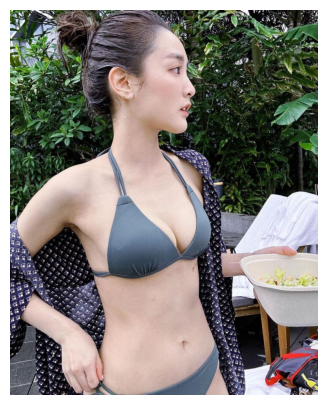

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

IMG_PATH = '/content/SadTalker/examples/source_image/339793119_1264695407470260_4124454059808866351_n.jpg'

plt.figure(figsize=(7, 5))
plt.axis('off')
plt.imshow(Image.open(IMG_PATH))
plt.show()

## Select the path of the audio

In [3]:
from IPython.display import Audio

AUDIO_PATH = '/content/SadTalker/examples/driven_audio/1743320244226890304-252999260021006.mp3'

Audio(AUDIO_PATH)

## Animation
The animation is more stable if you use an image with a resolution of 512x512. As for the audio duration, the maximum in Colab's free tier is 1 to 2 minutes, so if you use longer audio times, you will have to divide the audio into parts.

In [4]:
!python inference.py --driven_audio {AUDIO_PATH} \
           --source_image {IMG_PATH} \
           --result_dir ./results \
           --still \
           --preprocess full \
           --enhancer gfpgan  # apply face restoration and super-resolution

python3: can't open file '/content/inference.py': [Errno 2] No such file or directory


Details about the [parameters](https://github.com/OpenTalker/SadTalker/blob/main/docs/best_practice.md)

## Show result

In [2]:
from moviepy.editor import VideoFileClip
import glob

video_path = glob.glob("./results/*.mp4")
clip = VideoFileClip(video_path[0]).resize(height=420)
clip.ipython_display()

ModuleNotFoundError: No module named 'moviepy.editor'

The result file is in /content/SadTalker/results

# Run APP SadTalker with TTS

In [ ]:
%cd /content/SadTalker

!sed -i 's/demo.launch(debug=True)/demo.launch(share=True)/' app_sadtalker.py
!sed -i 's/model_name = TTS\.list_models()/model_name = TTS().list_models()/' src/utils/text2speech.py

!python app_sadtalker.py

# Resources

- https://github.com/Zz-ww/SadTalker-Video-Lip-Sync

- https://huggingface.co/spaces/kevinwang676/ChatGLM2-VC-SadTalker

- https://github.com/KevinWang676/ChatGLM2-Voice-Cloning/blob/main/ChatGLM2_VC_SadTalker.ipynb



LICENSE https://github.com/OpenTalker/SadTalker/blob/main/LICENSE | This repository can only be used for personal/research/non-commercial purposes.